# Step 1: Installation and Setup

In [0]:
!pip install -q tensorflow-gpu

In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to google colab

In [5]:
# install kaggle API
! pip install kaggle

In [0]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [7]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [0]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [10]:
# list of datasets
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)    1GB  2020-04-17 22:02:37          53596  
roche-data-science-coalition/uncover                           UNCOVER COVID-19 Challenge                          123MB  2020-04-08 22:04:30           4207  
praveengovi/coronahack-chest-xraydataset                       CoronaHack -Chest X-Ray-Dataset                       1GB  2020-03-20 01:26:40            705  
katerpillar/meteonet                                           MeteoNet North-West France                           11GB  2020-04-16 08:35:45             55  
andrewmvd/covid19-ct-scans                    

In [11]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

 99% 65.0M/66.0M [00:01<00:00, 24.6MB/s]
100% 66.0M/66.0M [00:01<00:00, 42.8MB/s]


In [12]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [14]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [15]:
dataset_1.shape

(284807, 31)

In [16]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [0]:
# balence the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [20]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [0]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [22]:
non_fraud_t.shape

(492, 31)

In [0]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [24]:
print(dataset)

         Time        V1        V2        V3  ...       V27       V28  Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1
..        ...       ...       ...       ...  ...       ...       ...     ...    ...
979  146420.0  2.095018 -0.835844 -1.101716  ...  0.014563 -0.010905   39.99      0
980   63953.0 -0.833054  0.985588  1.177395  ... -0.054675  0.049999   29.99      0
981  129638.0 -1.590826  1.939868  0.073976  ...  0.012120  0.215767    0.77      0
982  146250.0  0.288887  0.903305 -0.554348  ...  0.096425  0.120924    1.98      0
983  160580.0 -0.550672  0.758791  1.353265  ... -1.350202 -0.603465   15.18

In [25]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [0]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [0]:
# dependent variable
y = dataset['Class']

In [28]:
x.shape, y.shape

((984, 30), (984,))

In [0]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [30]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [0]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
x_train

array([[-0.34054092,  0.67050191, -0.34081292, ..., -0.16146727,
        -0.02724446, -0.46132432],
       [-0.83039141,  0.49971313, -0.098828  , ...,  0.48583103,
         0.56177048, -0.46132432],
       [-0.86747248,  0.18048534,  0.09861879, ...,  0.32312942,
         0.41747768, -0.4601953 ],
       ...,
       [-0.2955378 ,  0.68141564, -0.35354581, ..., -0.16495393,
        -0.04785867, -0.46132432],
       [ 0.72026184,  0.80758902, -0.5661096 , ..., -0.15395964,
        -0.18473922, -0.32377209],
       [ 0.92740579,  0.50505718,  0.02826735, ..., -0.03419889,
        -0.33185441, -0.18015138]])

In [0]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [34]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [0]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [36]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [0]:
# defining an object
model = tf.keras.models.Sequential()

In [0]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [0]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [0]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [0]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [0]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [0]:
epochs=25

In [47]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/25
787/787 [==============================] - 8s 10ms/sample - loss: 0.8038 - accuracy: 0.6086 - val_loss: 0.6350 - val_accuracy: 0.7411
Epoch 2/25
787/787 [==============================] - 0s 181us/sample - loss: 0.5494 - accuracy: 0.7243 - val_loss: 0.5891 - val_accuracy: 0.8680
Epoch 3/25
787/787 [==============================] - 0s 186us/sample - loss: 0.4604 - accuracy: 0.7789 - val_loss: 0.5561 - val_accuracy: 0.8731
Epoch 4/25
787/787 [==============================] - 0s 167us/sample - loss: 0.4051 - accuracy: 0.8399 - val_loss: 0.5254 - val_accuracy: 0.8782
Epoch 5/25
787/787 [==============================] - 0s 170us/sample - loss: 0.3682 - accuracy: 0.8501 - val_loss: 0.4901 - val_accuracy: 0.8782
Epoch 6/25
787/787 [==============================] - 0s 184us/sample - loss: 0.3256 - accuracy: 0.8882 - val_loss: 0.4562 - val_accuracy: 0.8832
Epoch 7/25
787/787 [==============================] - 0s 185us/sample - loss: 0

In [0]:
# model predictions
y_pred = model.predict_classes(x_test)

In [50]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   2]
 [ 12  79]]


In [52]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9289340101522843


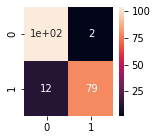

In [54]:
import seaborn as sns
# heat map of data
plt.figure(figsize=(2,2))
sns.heatmap(cm,annot=True)

# Step 6: Learning Curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

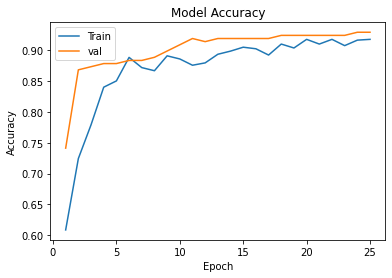

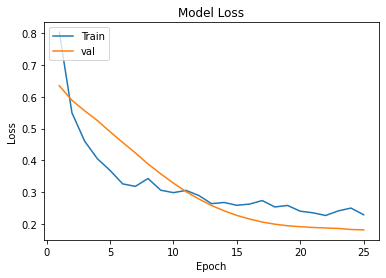

In [56]:
learning_curve(history, epochs)